# 2.4 RNN - Optimizing Hyperparameters

## Index
### Import Libraries and Data
### Reshape Data
### Split Data
### Bayesian Hyperparameter Optimization
### Create Keras Model
### Compile and run RNN Model
### Confusion Matrix of Model

## Import Libraries and Data

In [1]:
!pip install bayesian-optimization
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D, LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

C:\anaconda\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [3]:
path = r'C:/Users/Jack Bartman/OneDrive/CareerFoundry/Machine Learning'

In [5]:
# Import data
climate =pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'weather_clean.csv'))

In [7]:
pleasant =pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [9]:
climate.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8.0,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,6.0,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.0292,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28

In [11]:
# Drop date column from df_pleasant
pleasant = pleasant.drop(columns=['DATE'], axis=1)
pleasant.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
climate.shape

(22950, 135)

In [15]:
pleasant.shape

(22950, 15)

## Reshape Data

In [17]:
# Turn X and answers from a df to arrays

X = np.array(climate)
y = np.array(pleasant)

In [19]:
X = X.reshape(-1,15,9)

In [21]:
X.shape

(22950, 15, 9)

In [23]:
# Use argmax to transform y

y =  np.argmax(y, axis = 1)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
y.shape

(22950,)

In [27]:
# Check y layout

from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'multiclass'

## Split Data

In [29]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [31]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 15, 9) (17212,)
(5738, 15, 9) (5738,)


In [33]:
print("NaNs in X_train:", np.isnan(X_train).any())
print("NaNs in y_train:", np.isnan(y_train).any())

NaNs in X_train: False
NaNs in y_train: False


## Bayesian Hyperparameter Optimization

In [35]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = 15 # Number of weather stations
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [37]:
def bay_area(neurons, activation, kernel, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):

    from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl

    # Define optimizer and activation choices
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU, 'relu']

    # Round hyperparameters and safely retrieve values
    neurons = round(neurons)
    kernel = max(1, round(kernel))  # kernel size must be >=1
    activation_idx = min(round(activation), len(activationL)-1)
    optimizer_idx = min(round(optimizer), len(optimizerL)-1)
    activation = activationL[activation_idx]
    optimizer_name = optimizerL[optimizer_idx]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)

    # Convert optimizer string to actual object with learning rate
    opt_dict = {
        'Adam': Adam(learning_rate=learning_rate),
        'SGD': SGD(learning_rate=learning_rate),
        'RMSprop': RMSprop(learning_rate=learning_rate),
        'Adadelta': Adadelta(learning_rate=learning_rate),
        'Adagrad': Adagrad(learning_rate=learning_rate),
        'Adamax': Adamax(learning_rate=learning_rate),
        'Nadam': Nadam(learning_rate=learning_rate),
        'Ftrl': Ftrl(learning_rate=learning_rate)
    }
    opt = opt_dict.get(optimizer_name, Adam(learning_rate=learning_rate))

    def cnn_model():
        model = Sequential()
        model.add(Conv1D(neurons, kernel_size=kernel, activation=activation, input_shape=(timesteps, input_dim)))
        if normalization > 0.5:
            model.add(BatchNormalization())
        for _ in range(layers1):
            model.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            model.add(Dropout(dropout_rate, seed=123))
        for _ in range(layers2):
            model.add(Dense(neurons, activation=activation))
        model.add(MaxPooling1D())
        model.add(Flatten())
        model.add(Dense(n_classes, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        return model

    # Early stopping
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=20)

    try:
        nn = KerasClassifier(build_fn=cnn_model, epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[es])
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
        score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold).mean()
        print(f"Score returned: {score}")
        if score is None or np.isnan(score):
            return -1  # Return fallback if invalid
        return score
    except Exception as e:
        print("Bayesian optimization error:", e)
        return -1  # Always return a float


In [39]:
start = time.time()
params ={
    'neurons': (10, 100),
    'kernel': (1, 3),
    'activation':(0, 9), 
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size': (200, 1000), 
    'epochs':(20, 50),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}
# Run Bayesian Optimization
nn_opt = BayesianOptimization(bay_area, params, random_state=42)
nn_opt.maximize(init_points=15, n_iter=4) 
print('Search took %s minutes' % ((time.time() - start)/60))

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  kernel   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Score returned: nan
| 1         | -1.0      | 3.371     | 960.6     | 0.732     | 0.1796    | 24.68     | 1.312     | 1.116     | 2.732     | 0.6051    | 73.73     | 0.02058   | 6.789     |
Epoch 21: early stopping
Score returned: nan
| 2         | -1.0      | 7.492     | 369.9     | 0.1818    | 0.05502   | 29.13     | 2.05      | 1.864     | 1.582     | 0.6157    | 22.55     | 0.2921    | 2.565     |
Score returned: nan
| 3         | -1.0      | 4.105     | 828.1     | 0.1997    | 0.1543    | 37.77     | 1.093     | 2.215     | 1.341     | 0.0744    | 95.4      | 0.9656    | 5.659     |
Score returned: nan
| 4         | -1.0      | 2.742     | 278.1  

In [41]:
optimum = nn_opt.max['params']
learning_rate = optimum['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
optimum['activation'] = activationL[round(optimum['activation'])]
optimum['batch_size'] = round(optimum['batch_size'])
optimum['epochs'] = round(optimum['epochs'])
optimum['layers1'] = round(optimum['layers1'])
optimum['layers2'] = round(optimum['layers2'])
optimum['neurons'] = round(optimum['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(learning_rate=learning_rate), 'SGD':SGD(learning_rate=learning_rate),
             'RMSprop':RMSprop(learning_rate=learning_rate), 'Adadelta':Adadelta(learning_rate=learning_rate),
             'Adagrad':Adagrad(learning_rate=learning_rate), 'Adamax':Adamax(learning_rate=learning_rate),
             'Nadam':Nadam(learning_rate=learning_rate), 'Ftrl':Ftrl(learning_rate=learning_rate)}
optimum['optimizer'] = optimizerD[optimizerL[round(optimum['optimizer'])]]
optimum

{'activation': 'softsign',
 'batch_size': 961,
 'dropout': 0.7319939418114051,
 'dropout_rate': 0.17959754525911098,
 'epochs': 25,
 'kernel': 1.3119890406724053,
 'layers1': 1,
 'layers2': 3,
 'learning_rate': 0.6051038616257767,
 'neurons': 74,
 'normalization': 0.020584494295802447,
 'optimizer': <keras.src.optimizers.ftrl.Ftrl at 0x2b125a2f3e0>}

In [43]:
epochs = 25
batch_size = 916
n_hidden = 16

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = 15  # This should be the total number of classes (weather stations)

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax')) # Change activation to 'softmax'

In [45]:
model.summary()

Model: "sequential_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 16)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_470 (Dense)               │ (None, 15)             │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,919 (7.50 KB)

 Trainable params: 1,919 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and Run RNN Model

In [47]:
# Convert target variables to categorical using to_categorical
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [49]:
model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0450 - loss: 2.8759 - val_accuracy: 0.1621 - val_loss: 2.2922
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3095 - loss: 2.2478 - val_accuracy: 0.6379 - val_loss: 1.7773
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5535 - loss: 1.8258 - val_accuracy: 0.6415 - val_loss: 1.4941
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6162 - loss: 1.6004 - val_accuracy: 0.6415 - val_loss: 1.3505
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6202 - loss: 1.4889 - val_accuracy: 0.6417 - val_loss: 1.2606
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6274 - loss: 1.3912 - val_accuracy: 0.6417 - val_loss: 1.2003
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6220 - loss: 1.3358 - val_accuracy: 0.6417 - val_loss: 1.1600
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6223 - loss: 1.2972 - val_accuracy: 0.6417 - v

## Confusion Marix of Models

In [51]:
# Define list of stations names
stations = {
0: 'BASEL',
1: 'BELGRADE',
2: 'BUDAPEST',
3: 'DEBILT',
4: 'DUSSELDORF',
5: 'HEATHROW',
6: 'KASSEL',
7: 'LJUBLJANA',
8: 'MAASTRICHT',
9: 'MADRID',
10: 'MUNCHENB',
11: 'OSLO',
12: 'SONNBLICK',
13: 'STOCKHOLM',
14: 'VALENTIA'
}

In [53]:
def confusion_matrix(y_true, y_pred):
    # Get predicted labels for y_pred
    predicted_labels = np.argmax(y_pred, axis=1)

    # Get true labels for y_true - assuming y_true is one-hot encoded
    true_labels = np.argmax(y_true, axis=1)

    # Create lists of station names for true and predicted labels,
    # handling cases where label is not in 'stations'
    y_true_names = [stations.get(y, 'Unknown') for y in true_labels]
    y_pred_names = [stations.get(y, 'Unknown') for y in predicted_labels]

    # Create the crosstab DataFrame
    df_cm = pd.crosstab(pd.Series(y_true_names), pd.Series(y_pred_names),
                        rownames=['True'], colnames=['Pred'])

    # Plotting the heatmap
    plt.figure(figsize=(12, 10))  # Adjust figure size as needed
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")  # annot=True displays values
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


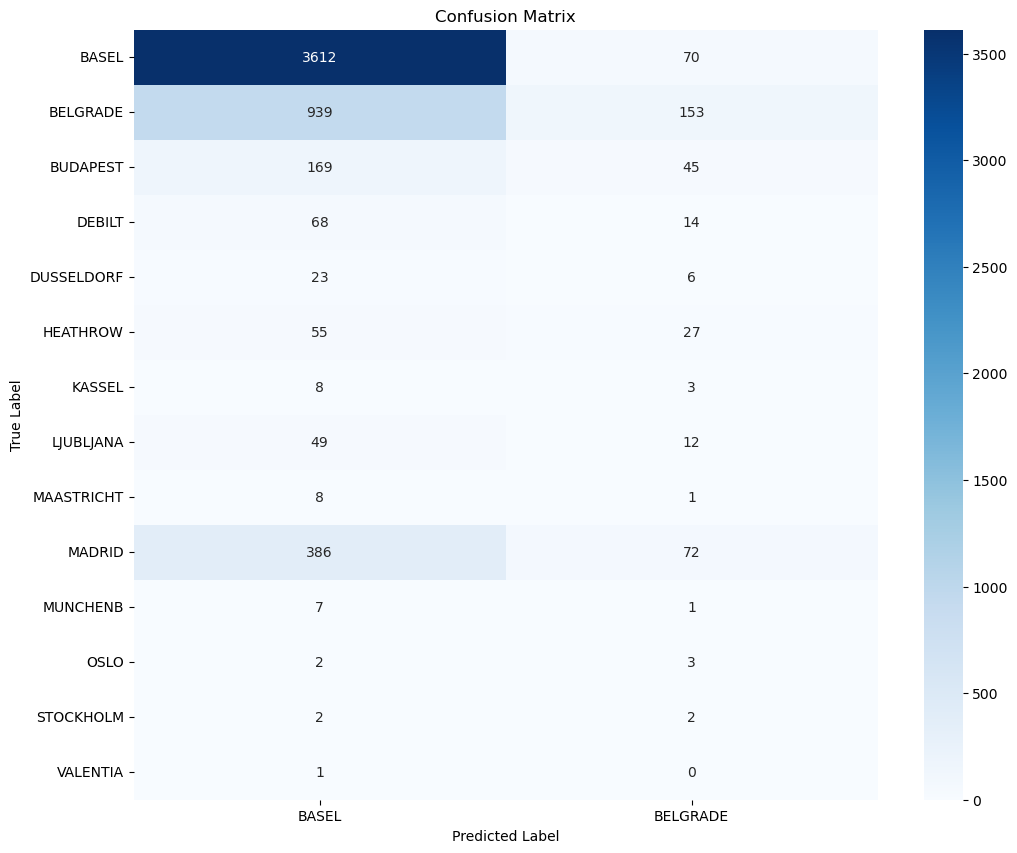

None


In [55]:
print(confusion_matrix(y_test, model.predict(X_test)))